In [ ]:
/content/Project.csv

Epoch 1/10
188/188 [==============================] - 5s 8ms/step - loss: 0.2698 - accuracy: 0.8924 - recall_1: 0.8272 - auc: 0.9553 - val_loss: 0.1109 - val_accuracy: 0.9638 - val_recall_1: 0.9389 - val_auc: 0.9911
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1088 - accuracy: 0.9638 - recall_1: 0.9425 - auc: 0.9913 - val_loss: 0.0788 - val_accuracy: 0.9727 - val_recall_1: 0.9607 - val_auc: 0.9954
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.9711 - recall_1: 0.9542 - auc: 0.9941 - val_loss: 0.0705 - val_accuracy: 0.9751 - val_recall_1: 0.9607 - val_auc: 0.9959
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.0665 - accuracy: 0.9774 - recall_1: 0.9624 - auc: 0.9963 - val_loss: 0.0659 - val_accuracy: 0.9791 - val_recall_1: 0.9694 - val_auc: 0.9966
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss: 0.0566 - accuracy: 0.9822 - recall_1: 0.9724 - auc: 0.9969 - v

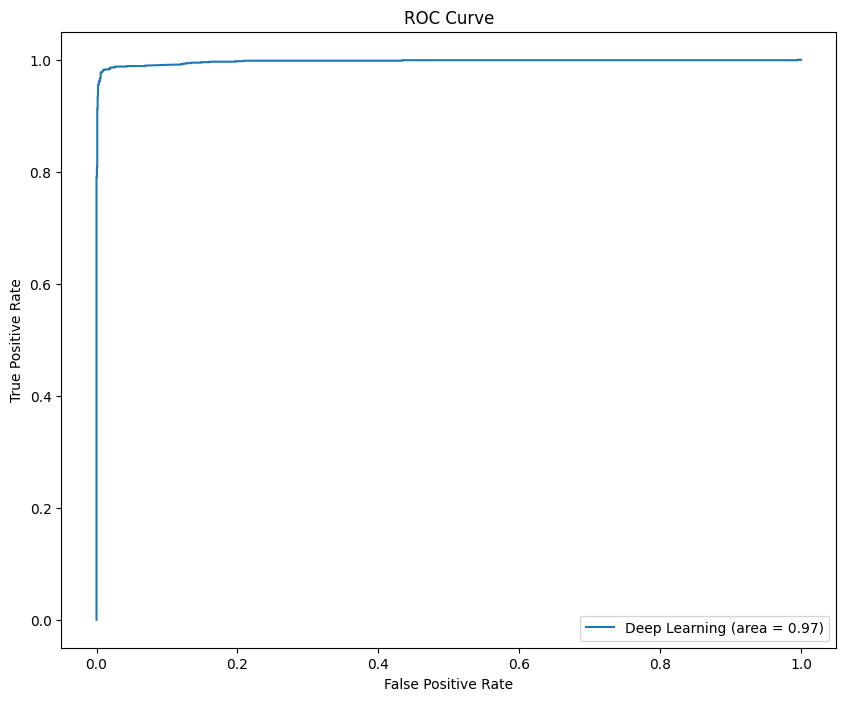

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1863
           1       0.99      0.97      0.98      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.98      0.98      3008
weighted avg       0.99      0.99      0.99      3008



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC, Accuracy, Recall
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt

# Assume X_train, X_test, y_train, y_test are already prepared and scaled appropriately

# Define the Keras model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', Recall(), AUC(name='auc')])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Predict probabilities
y_pred_proba_dl = model.predict(X_test).ravel()

# Calculate ROC curve
fpr_dl, tpr_dl, thresholds_dl = roc_curve(y_test, y_pred_proba_dl)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dl, tpr_dl, label='Deep Learning (area = %0.2f)' % scores[2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Classification report
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)
print(classification_report(y_test, y_pred_dl))
